In [ ]:
!pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=71e7836389c987e7ef552f70ac43327f783b2e93defee5e00138107e5245344c
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

Pobieram treść atrykułów o 3 różnych tematykach: Polityka, Piłka Nożna, Nowe Technologie. Ustawiam miejsce startu (start_list) i stopu (stop_list) scrapingu i fragmenty które chce wyciąć (delete_list). Następnie zapisuje cały artykuł jako jeden długi string bez liczb i dodaje do korpusu

In [ ]:
# Polityka, Piłka Nożna, Nowe Technologie

urls = ["https://wiadomosci.onet.pl/kraj/wybitne-wystapienie-w-tvp-info-o-expose-mateusza-morawieckiego/m64ksrm",
        "https://wiadomosci.onet.pl/kraj/posel-glinski-nie-przestawal-mowic-marszalkini-blyskawicznie-zareagowala/fblzkm5",
        "https://wiadomosci.onet.pl/kraj/koniec-rzadu-mateusza-morawieckiego-sejm-nie-przyjal-wotum-zaufania/f3259bf",
        "https://wiadomosci.onet.pl/kraj/ostatnie-wystapienie-mateusza-morawieckiego-jako-premiera/ytyhygy",
        "https://wiadomosci.onet.pl/kraj/expose-premiera-morawieckiego-rozmowa-z-prof-rafalem-chwedorukiem/fh21qr5",
        "https://przegladsportowy.onet.pl/pilka-nozna/liga-mistrzow/robert-lewandowski-w-scislej-czolowce-ligi-mistrzow-wielki-wyczyn/plsyv7k",
        "https://przegladsportowy.onet.pl/pilka-nozna/liga-mistrzow/sensacyjny-sklad-barcelony-liga-mistrzow-bez-roberta-lewandowskiego/nrvy677",
        "https://przegladsportowy.onet.pl/pilka-nozna/liga-mistrzow/zespoly-polakow-musza-walczyc-emocje-na-koniec-fazy-grupowej-ligi-mistrzow/fspw875",
        "https://przegladsportowy.onet.pl/pilka-nozna/liga-mistrzow/grabara-przytoczyl-rozmowe-ze-szwarga-i-sie-zaczelo-trener-odpowiada/1ddpqdp",
        "https://przegladsportowy.onet.pl/pilka-nozna/liga-mistrzow/najlepszy-pilkarz-poczatku-sezonu-trafi-pod-skalpel-leczenie-nie-przynioslo-efektu/9bk1lsm",
        "https://businessinsider.com.pl/technologie/nowe-technologie/gemini-to-nowa-era-ai-zdaniem-googlea-ma-pokonac-chatgpt/9744zw1",
        "https://businessinsider.com.pl/technologie/nowe-technologie/tysiace-miesiecznie-na-aplikacje-randkowe-bezplatne-wersje-na-granicy-bezuzytecznosci/ec7h0h1",
        "https://businessinsider.com.pl/technologie/nowe-technologie/etyczny-haker-czyli-zawod-godny-obecnych-czasow-zarobisz-setki-tysiecy/hgteg3x",
        "https://businessinsider.com.pl/technologie/nowe-technologie/sztuczna-inteligencja-pozwoli-ocenic-czego-nauczyli-sie-uczestnicy-szkolen-bhp/pjdczfh",
        "https://businessinsider.com.pl/technologie/nowe-technologie/projektowanie-gier-mobilnych-latwiejsze-dzieki-ai-mimo-to-jest-gorzej/774mjx5"]

korpus = []

start_list = ["KOPIUJ LINK","Przegląd Sportowy","Udostępnij artykuł"]
stop_list = ["Bądź na bieżąco!","sonda","Dziękujemy, że przeczytałaś/eś nasz artykuł do końca.",
             "Czytaj także w BUSINESS INSIDER","Najpopularniejsze w BUSINESS INSIDER"]
delete_list = ["block open",'',"/* <![CDATA[ */\n\n      if (!adsNoBanner)\n        onetAds.adSlots.push('flat-intext');\n\n    /* ]]> */",
               "block end","Enet Widget","Robert Lewandowski (Foto: FC Barcelona/Twitter, ZUMA/Newspix.pl / newspix.pl)",
               "Kamil Grabara (Foto: Stefan Matzke / Getty Images)","Jude Bellingham (Foto: Lasha Kuprashvili/MB Media / Contributor / Getty Images)",
               ]

for url in urls:
  doc = requests.get(url)
  soup = BeautifulSoup(doc.content, 'html.parser')

  texts = soup.find_all(text=True)

  start = 0

  doc = []

  for text in texts:
      if text.strip() and text.strip() in start_list:
        start = 1
        continue
      if text.strip() and text.strip() in stop_list:
        break
      if start == 1:
        if text.strip() not in delete_list:
          doc.append(text.strip())

  doc_combined = ' '.join(doc)
  doc_no_nums =  re.sub(r'\d+', '', doc_combined)
  korpus.append(doc_no_nums)

<ipython-input-3-7c5310492c8b>:33: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  texts = soup.find_all(text=True)


Wyświetlenie treści dokumentów

In [ ]:
for i in korpus:
  print(i)

print(len(korpus))

"Wybitne wystąpienie". Tak exposé Mateusza Morawieckiego ocenił zaproszony komentator podczas specjalnego programu TVP Info, emitowanego z okazji poniedziałkowego przemówienia. W programie "paski" z cytatami dostali tylko Morawiecki oraz Jarosław Kaczyński, prezes PiS. Szefowie innych frakcji w Sejmie otrzymywali tylko "pasek" z nazwiskiem przemawiającego posła oraz z nazwą klubu. Darek Delmanowicz / PAP TVP Info o exposé Mateusza Morawieckiego teaser ‹ wróć contentShareBottom Więcej informacji znajdziesz na stronie głównej Onetu Specjalny program z okazji exposé Mateusza Morawieckiego w TVP Info rozpoczął się tuż jego wystąpieniem. Tym razem słynni "paskowi" ograniczyli się do wypisywania w czerwonych ramkach – emitowanych w dole ekranu – głównych tez z poniedziałkowego przemówienia: "dobro Polski jest zawsze na pierwszym miejscu", "średnie wynagrodzenie Polaków ma wynosić  tysięcy złotych" czy "wybierzmy dialog, szukajmy tego, co nas łączy". Materiały zewnętrzne Jeden z "pasków" podc

Pobranie polskich stop words z githuba i zastosowanie ich w Tfidf

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

!git clone 'https://github.com/bieli/stopwords.git'

with open('stopwords/polish.stopwords.txt', 'r', encoding='utf-8') as file:
    custom_stop_words = file.readlines()
custom_stop_words = [word.strip() for word in custom_stop_words]

print(custom_stop_words)

vectorizer = TfidfVectorizer(stop_words = custom_stop_words, smooth_idf=True)

X = vectorizer.fit_transform(korpus)
vectorizer.get_feature_names_out()

Cloning into 'stopwords'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Receiving objects: 100% (22/22), 7.04 KiB | 7.04 MiB/s, done.
Resolving deltas: 100% (3/3), done.
['a', 'aby', 'ach', 'acz', 'aczkolwiek', 'aj', 'albo', 'ale', 'alez', 'ależ', 'ani', 'az', 'aż', 'bardziej', 'bardzo', 'beda', 'bedzie', 'bez', 'deda', 'będą', 'bede', 'będę', 'będzie', 'bo', 'bowiem', 'by', 'byc', 'być', 'byl', 'byla', 'byli', 'bylo', 'byly', 'był', 'była', 'było', 'były', 'bynajmniej', 'cala', 'cali', 'caly', 'cała', 'cały', 'ci', 'cie', 'ciebie', 'cię', 'co', 'cokolwiek', 'cos', 'coś', 'czasami', 'czasem', 'czemu', 'czy', 'czyli', 'daleko', 'dla', 'dlaczego', 'dlatego', 'do', 'dobrze', 'dokad', 'dokąd', 'dosc', 'dość', 'duzo', 'dużo', 'dwa', 'dwaj', 'dwie', 'dwoje', 'dzis', 'dzisiaj', 'dziś', 'gdy', 'gdyby', 'gdyz', 'gdyż', 'gdzie', 'gdziekolwiek', 'gdzies', 'gdzieś', 'go', 'i', 'ich', 'ile', 'im', 'inna', 'inne', 'inny', 'innych', 'iz', 'iż'

array(['absurdu', 'adresuje', 'agencja', ..., 'żyje', 'żywo', 'żyć'],
      dtype=object)

Ilość słów przed lemma

In [ ]:
print(len(vectorizer.get_feature_names_out()))

2515


Macierz X Tfidf

In [ ]:
print(X.toarray())

[[0.         0.         0.04250877 ... 0.         0.         0.        ]
 [0.04995916 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.03517796]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.03682466 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04906636 0.         0.        ]]


Pobranie pl_core_news_sm z pakietu spacy

In [ ]:
!python -m spacy download pl_core_news_sm

2023-12-13 21:25:38.958690: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 21:25:38.958779: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 21:25:38.958842: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 21:25:38.975870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 21:25:42.065606: W tensorflow/compiler/

Zastosowanie lemma z pakietu spacy i wyświetlenie nowej macierzy

In [ ]:
import spacy

nlp = spacy.load("pl_core_news_sm")
korpus2 =[]
lem = [nlp(x) for x in korpus]
for x in lem:
  korpus2.append(' '.join([w.lemma_ for w in x]))
X = vectorizer.fit_transform(korpus2)
vectorizer.get_feature_names_out()
print(X.toarray())

[[0.         0.         0.07972153 ... 0.         0.         0.        ]
 [0.0490364  0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.03023751]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.03450662 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.03752489]]


Ilość słów po lemma

In [ ]:
print(len(vectorizer.get_feature_names_out()))

1853


Zastosowanie SVD z pakietu sklearn.decomposition i wyświetlenie macierzyU i Vt i S. Podaje n_components = 3 ponieważ wybierałem artukuły o 3 różnych tematykach. Patrząc na wymiary macierzy widać że SVD przebiegło pomyślnie

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3)
svd.fit(X)

reduced_data = svd.fit_transform(X)

singular_values = svd.singular_values_

right_singular_vectors = svd.components_


print("\nMacierz U:")
print(reduced_data, reduced_data.shape)
print("\nMacierz S:")
print(singular_values)
print("\nMacierz V^T:")
print(right_singular_vectors,right_singular_vectors.shape)


Macierz U:
[[ 0.34396465 -0.21957034 -0.08499419]
 [ 0.46239505 -0.26126157 -0.11293169]
 [ 0.56472477 -0.36567402 -0.13859806]
 [ 0.6617477  -0.35593003 -0.08430057]
 [ 0.54977197 -0.29686107 -0.04351802]
 [ 0.32481061  0.52540304 -0.14792875]
 [ 0.3429518   0.58006209 -0.18048836]
 [ 0.36931667  0.54095971 -0.04590244]
 [ 0.31072332  0.39032199 -0.08966237]
 [ 0.25431709  0.34357453  0.10376747]
 [ 0.09743175  0.00686322  0.36574158]
 [ 0.14067728  0.01218114  0.52001653]
 [ 0.12763651  0.02205838  0.40827138]
 [ 0.18778846  0.01444311  0.47358215]
 [ 0.21437583  0.07292408  0.55030492]] (15, 3)

Macierz S:
[1.42784055 1.28326147 1.10523554]

Macierz V^T:
[[ 0.03307189  0.00171611  0.01660644 ...  0.02704271  0.02266516
   0.01932576]
 [-0.02233852  0.00015215 -0.0102555  ... -0.01777965  0.00634184
  -0.00972131]
 [-0.00844932  0.01074729  0.0078621  ... -0.00588056 -0.00854446
   0.01184745]] (3, 1853)


In [ ]:
tokens = vectorizer.get_feature_names_out()


Funkcja rysowanie chmury tagów

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def draw_cloud(class_nr):

  word_frequencies = right_singular_vectors[class_nr]

  word_frequency_dict = {word: freq for word, freq in zip(tokens, word_frequencies)}

  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency_dict)

  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

Zastosowanie funkcji dla tematu: Polityka

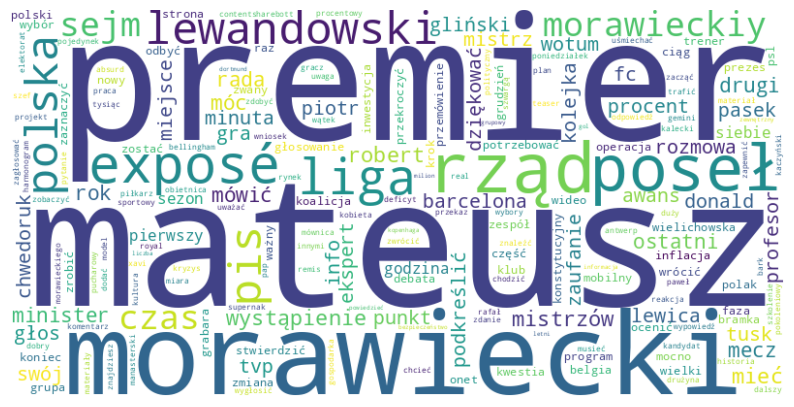

In [ ]:
draw_cloud(0)

Dla Piłki Nożnej

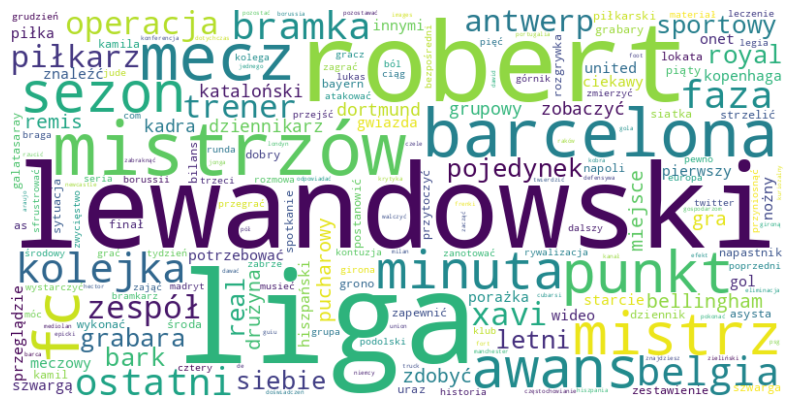

In [ ]:
draw_cloud(1)

Dla Nowych Technologii

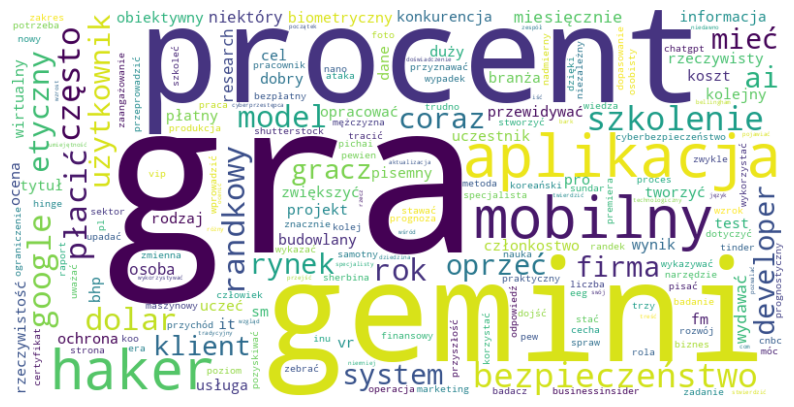

In [ ]:
draw_cloud(2)

Tworze funkcje rysującą wykres radarowy na podstawie przynależności danego teksty do danego tematu

Obliczam tą wartość sprawdzając każde słowo w aktykuje jaką ma "siłe" w danym temacie i zapisuje wartość w tablicy values (values[0] - Polityka, values[1] - Piłka nożna, values[2] - Technologia). Każda następna wartość jest dodawana do odpowiedniego indeksu na liście.

Zezwalam na wartości ujemne. Oznaczają one że te słowo "bardzo nie pasuje" do danego tematu

In [ ]:
import plotly.graph_objects as go
import numpy as np

def radar(class_nr):
  doc = korpus2[class_nr]

  values = [0,0,0]

  doc_list = doc.split()

  for word in doc_list:
    index = np.where(tokens == word)[0]
    if not index:
      continue
    values[0] += right_singular_vectors[0][index]
    values[1] += right_singular_vectors[1][index]
    values[2] += right_singular_vectors[2][index]
    # print(index, right_singular_vectors[0][index])

  list_values = [value[0] for value in values]

  print(list_values)

  names = ['Polityka',"Piłka Nożna","Technologia"]

  data = [go.Scatterpolar(
            r=list_values,
            theta=names,
            fill='toself',
            name='Mirek'
            )
        ]

  layout = go.Layout(
            polar=dict(radialaxis=dict(visible=True, range=[0,15])),
            showlegend=False,
            title={'text':'<b>Radar plot</b>',
                  'x': 0.5},
  )

  fig = go.Figure(data=data, layout=layout)

  fig.show()

Wykonuje funkcje dla nrktórych moich dokumnetów. Dla arykułu nr 2 Polityka

Widać że mocna dominacja tematem Polityka

In [ ]:
radar(3)

<ipython-input-17-f90cd1cab669>:13: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not index:


[22.682713388467374, -10.168893955570601, -1.0154239329927528]


Dla artykułu nr 5 Polityka podobnie

In [ ]:
radar(4)

[14.025476064943785, -6.279854854376926, 0.2878579828545189]


<ipython-input-17-f90cd1cab669>:13: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



Dla aktykułu nr 3 w Piłce nożnej. Widać że artykuł jest o Piłce nożnej, ale zawiera też słowa z tematyki politycznej

In [ ]:
radar(7)

[10.509379633426349, 13.250841177003254, 0.15496476700007933]


<ipython-input-17-f90cd1cab669>:13: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



Dla artykułu nr 9 widaż że występują słowa ze wszystkich 3 tematów, ale dominuje Piłka nożna

In [ ]:
radar(9)

[4.841101843294946, 5.758491841121997, 2.0735555859479105]


<ipython-input-17-f90cd1cab669>:13: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



Widaż tutaj również dominację Piłką nożną

In [ ]:
radar(8)

<ipython-input-17-f90cd1cab669>:13: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[6.549788534647095, 7.728941304053097, -1.4166936903164435]


Dla artykułu nr 2 w Technologii widać dużą dominację tematu Technologia

In [ ]:
radar(11)

<ipython-input-17-f90cd1cab669>:13: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[3.88779966195218, 0.38800984691375323, 11.777825509423048]


Dla ostaniego artykułu nr 5 z Technologii widaż że jest lekkie powiązanie z tematem Piłki nożnej, większe z Polityką, ale największe z Technologią

In [ ]:
radar(14)

<ipython-input-17-f90cd1cab669>:13: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[6.303453228537522, 1.9909223808250025, 14.212112702595215]


Dla artykułu nr 13 ze wszystkich, podobny wynik jak wcześniej

In [ ]:
radar(13)

<ipython-input-17-f90cd1cab669>:13: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[5.993504788533056, 0.4586678738995294, 12.566928165228495]
